<a href="https://colab.research.google.com/github/krdpk17/first_simple_network/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODE BLOCK: 1

In [17]:
import torch
import torch.nn.functional as F
import torch.optim as optim


In [18]:
import utils
import model

CODE BLOCK: 2

In [19]:
cuda = utils.is_cuda_available()
device = cuda

CUDA Available? False


In [20]:
train_transforms = model.config_train_transform()
test_transforms = model.config_test_transform()

CODE BLOCK: 3

In [21]:
train_data = utils.load_data(transform=train_transforms)
test_data = utils.load_data(transform=test_transforms)

CODE BLOCK: 4

CODE BLOCK: 5

In [22]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

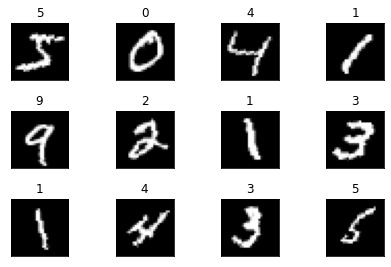

In [23]:
utils.plot_data(train_loader)

CODE BLOCK: 7

CODE BLOCK: 8

In [24]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [25]:
model = model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(model, device, train_loader, optimizer, criterion)
  utils.test(model, device, train_loader, criterion)
  scheduler.step()

TypeError: nn.Module.to only accepts floating point or complex dtypes, but got desired dtype=torch.bool

CODE BLOCK: 11

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")